In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data downloaded from Kaggle (Titanic: Machine Learning from Disaster - https://www.kaggle.com/c/titanic/data)
df_train=pd.read_csv('titanic_train.csv')
df_test=pd.read_csv('titanic_test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#df_test.info()

In [6]:
data=pd.concat([pd.DataFrame(data=df_train),pd.DataFrame(data=df_test)])
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [7]:
data.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
#Missing values
missing_count=data.isnull().sum().sort_values(ascending=False)
missing_percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([missing_count,missing_percent],axis=1,keys=['Count','Percentage'])
#missing_data
missing_data.head(6)

,Count,Percentage
Cabin,1014,77.463713
Survived,418,31.932773
Age,263,20.091673
Embarked,2,0.152788
Fare,1,0.076394
Ticket,0,0.000000


In [10]:
data.shape

(1309, 12)

In [11]:
#Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

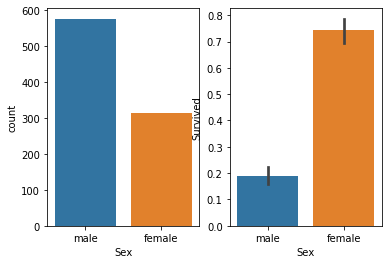

In [13]:
#Sex Vs Survival Relationship
fig,a=plt.subplots(1,2)
sns.countplot(df_train['Sex'],ax=a[0])
sns.barplot(x='Sex',y='Survived',data=df_train,ax=a[1])

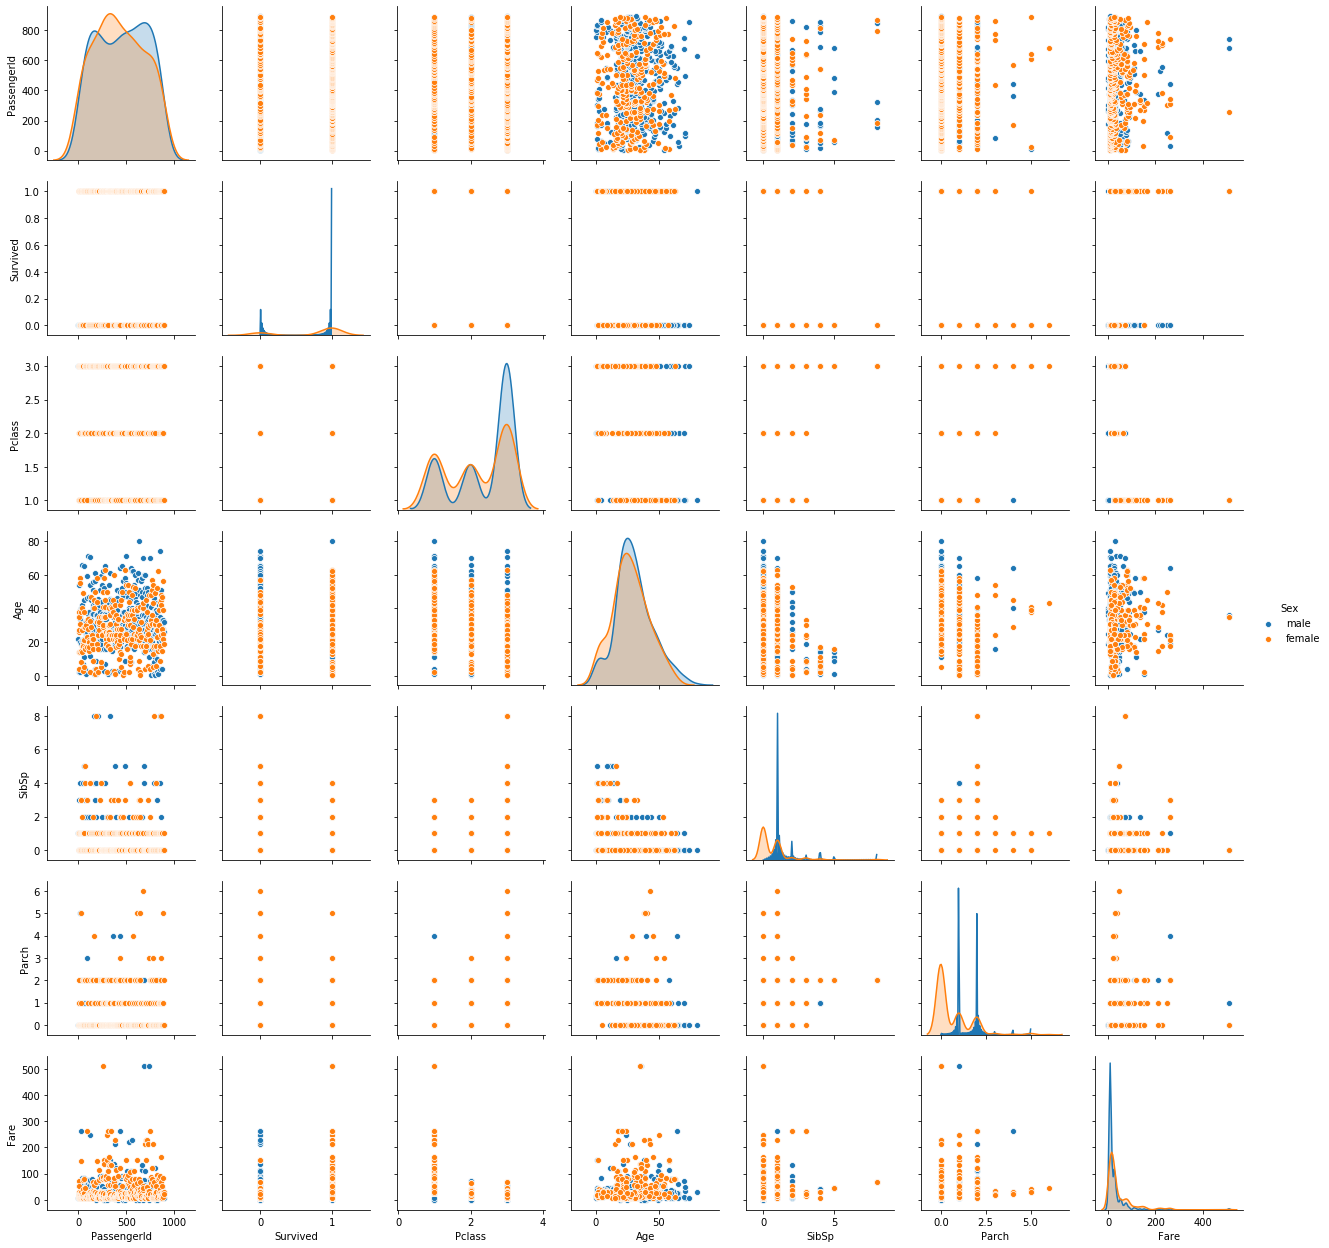

In [14]:
sns.pairplot(df_train,hue='Sex')

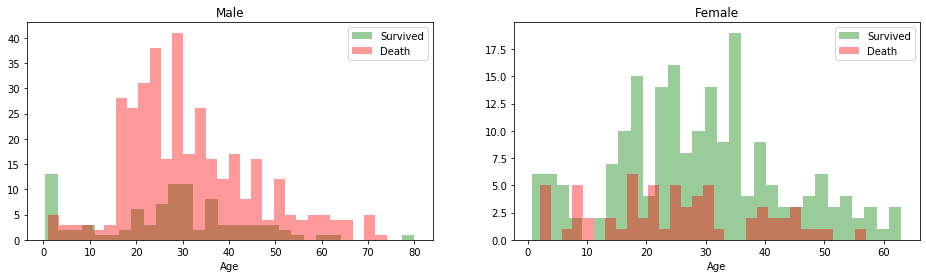

In [15]:
male=df_train[df_train['Sex']=='male']
female=df_train[df_train['Sex']=='female']
fig,a=plt.subplots(1,2,figsize=(16,4))
fig1=sns.distplot(male[male['Survived']==1].Age.dropna(),bins=30,kde=False,ax=a[0],label='Survived',color='g')
fig1=sns.distplot(male[male['Survived']==0].Age.dropna(),bins=30,kde=False,ax=a[0],label='Death',color='r')
fig2=sns.distplot(female[female['Survived']==1].Age.dropna(),bins=30,kde=False,ax=a[1],label='Survived',color='g')
fig2=sns.distplot(female[female['Survived']==0].Age.dropna(),bins=30,kde=False,ax=a[1],label='Death',color='r')
fig2.set_title('Female')
fig1.set_title('Male')
fig1.legend()
fig2.legend()

SibSp & ParCh > Family

In [16]:
#df_train backup
train_data=df_train.copy()
train_data.shape

(891, 12)

In [17]:
#Adding 'Family' to train dataset
for i in (df_train,df_test):
    i['Family']=i['SibSp']+i['Parch']

In [18]:
df_train.shape

(891, 13)

In [19]:
df_train['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

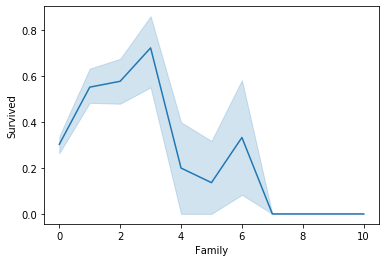

In [20]:
sns.lineplot(x='Family',y='Survived',data=df_train)

In [21]:
#Since PassengerId has nothing to do with the survival, let's drop it from both training and testing set
df_train=df_train.drop(['PassengerId'],axis=1)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [22]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

In [23]:
#** Missing Values **#
#Embarked only had 2 missing values; replacing with mode
df_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
df_train['Embarked'].isnull().sum()

2

In [25]:
df_train['Embarked']=df_train['Embarked'].fillna('S')
df_train['Embarked'].isnull().sum()

0

In [26]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [27]:
df_train['Cabin'].isnull().sum()

687

In [28]:
df_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [29]:
#Cabin values seem to be letter followed by a numerical value. Hence, filling all nulls values with 'Z0'
df_train['Cabin']=df_train['Cabin'].fillna('Z0')
df_train['Cabin'].isnull().sum()

0

In [30]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family'],
      dtype='object')

'Name' and 'Ticket' does not contribute to the survival chance of the dataset. Dropping 'Name' and 'Ticket'

In [31]:
df_train=df_train.drop(['Name','Ticket'],axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,0,3,male,22.0,1,0,7.2500,Z0,S,1
1,1,1,female,38.0,1,0,71.2833,C85,C,1
2,1,3,female,26.0,0,0,7.9250,Z0,S,0
3,1,1,female,35.0,1,0,53.1000,C123,S,1
4,0,3,male,35.0,0,0,8.0500,Z0,S,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Z0,S,0
887,1,1,female,19.0,0,0,30.0000,B42,S,0
888,0,3,female,NaN,1,2,23.4500,Z0,S,3
889,1,1,male,26.0,0,0,30.0000,C148,C,0


In [32]:
df_train['Age'].isnull().sum()

177

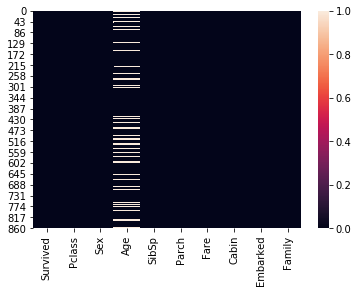

In [33]:
sns.heatmap(df_train.isnull())

In [34]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
a=np.array(df_train['Age'].values)
#a
a=a.reshape(-1,1)
a.shape

(891, 1)

In [36]:
train_data.shape

(891, 12)

In [37]:
from sklearn.impute import KNNImputer

In [38]:
ki=KNNImputer(n_neighbors=5)
a=ki.fit_transform(a)

In [39]:
#Drop Age in df_train and concatenate 'a' to df_train
df_train=df_train.drop(columns=['Age'])
df_train=pd.concat([df_train,pd.DataFrame(a,columns=['Age'])],axis=1)
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Family,Age
0,0,3,male,1,0,7.2500,Z0,S,1,22.000000
1,1,1,female,1,0,71.2833,C85,C,1,38.000000
2,1,3,female,0,0,7.9250,Z0,S,0,26.000000
3,1,1,female,1,0,53.1000,C123,S,1,35.000000
4,0,3,male,0,0,8.0500,Z0,S,0,35.000000
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Z0,S,0,27.000000
887,1,1,female,0,0,30.0000,B42,S,0,19.000000
888,0,3,female,1,2,23.4500,Z0,S,3,29.699118
889,1,1,male,0,0,30.0000,C148,C,0,26.000000


In [40]:
df_train['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [41]:
df_train['Age'].isnull().sum()

0

In [42]:
df_train['Age']=df_train['Age'].astype(int)
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Family,Age
0,0,3,male,1,0,7.2500,Z0,S,1,22
1,1,1,female,1,0,71.2833,C85,C,1,38
2,1,3,female,0,0,7.9250,Z0,S,0,26
3,1,1,female,1,0,53.1000,C123,S,1,35
4,0,3,male,0,0,8.0500,Z0,S,0,35
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Z0,S,0,27
887,1,1,female,0,0,30.0000,B42,S,0,19
888,0,3,female,1,2,23.4500,Z0,S,3,29
889,1,1,male,0,0,30.0000,C148,C,0,26


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Cabin       891 non-null object
Embarked    891 non-null object
Family      891 non-null int64
Age         891 non-null int32
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


In [44]:
pd.qcut(df_train['Age'],q=5)

0        (20.0, 28.0]
1        (29.0, 38.0]
2        (20.0, 28.0]
3        (29.0, 38.0]
4        (29.0, 38.0]
            ...      
886      (20.0, 28.0]
887    (-0.001, 20.0]
888      (28.0, 29.0]
889      (20.0, 28.0]
890      (29.0, 38.0]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64]): [(-0.001, 20.0] < (20.0, 28.0] < (28.0, 29.0] < (29.0, 38.0] < (38.0, 80.0]]

In [45]:
df_train['Age_Group']=pd.qcut(df_train['Age'],q=[0, 0.2, 0.4, 0.6, 0.8, 1],labels=range(0,5))
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Family,Age,Age_Group
0,0,3,male,1,0,7.2500,Z0,S,1,22,1
1,1,1,female,1,0,71.2833,C85,C,1,38,3
2,1,3,female,0,0,7.9250,Z0,S,0,26,1
3,1,1,female,1,0,53.1000,C123,S,1,35,3
4,0,3,male,0,0,8.0500,Z0,S,0,35,3
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Z0,S,0,27,1
887,1,1,female,0,0,30.0000,B42,S,0,19,0
888,0,3,female,1,2,23.4500,Z0,S,3,29,2
889,1,1,male,0,0,30.0000,C148,C,0,26,1


In [46]:
df_train['Age_Group'].value_counts()

2    197
1    184
0    180
4    177
3    153
Name: Age_Group, dtype: int64

In [47]:
df_train['Fare_Group']=pd.qcut(df_train['Fare'],q=[0, 0.2, 0.4, 0.6, 0.8, 1],labels=range(0,5))
df_train['Fare_Group'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_Group, dtype: int64

In [48]:
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Family,Age,Age_Group,Fare_Group
0,0,3,male,1,0,7.2500,Z0,S,1,22,1,0
1,1,1,female,1,0,71.2833,C85,C,1,38,3,4
2,1,3,female,0,0,7.9250,Z0,S,0,26,1,1
3,1,1,female,1,0,53.1000,C123,S,1,35,3,4
4,0,3,male,0,0,8.0500,Z0,S,0,35,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Z0,S,0,27,1,2
887,1,1,female,0,0,30.0000,B42,S,0,19,0,3
888,0,3,female,1,2,23.4500,Z0,S,3,29,2,3
889,1,1,male,0,0,30.0000,C148,C,0,26,1,3


In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [50]:
df_train['Sex_Type']=le.fit_transform(df_train['Sex'])
df_train=df_train.drop(columns=['Sex'])
df_train

,Survived,Pclass,SibSp,Parch,Fare,Cabin,Embarked,Family,Age,Age_Group,Fare_Group,Sex_Type
0,0,3,1,0,7.2500,Z0,S,1,22,1,0,1
1,1,1,1,0,71.2833,C85,C,1,38,3,4,0
2,1,3,0,0,7.9250,Z0,S,0,26,1,1,0
3,1,1,1,0,53.1000,C123,S,1,35,3,4,0
4,0,3,0,0,8.0500,Z0,S,0,35,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,Z0,S,0,27,1,2,1
887,1,1,0,0,30.0000,B42,S,0,19,0,3,0
888,0,3,1,2,23.4500,Z0,S,3,29,2,3,0
889,1,1,0,0,30.0000,C148,C,0,26,1,3,1


In [51]:
df_train['Cabin'][27]

'C23 C25 C27'

In [52]:
df_train['SibSp'][27]

3

In [53]:
import re
df_cabin=[]
for i in df_train['Cabin']:
    j="".join(re.split("[^A-Z]*", i))
    #passengers with SibSp has booked more than one cabin; taking only first cabin alphabet
    if len(j)>1:
        j=j[0]
    df_cabin.append(j)

In [54]:
#Dropping existing Cabin column and concatenating new Cabin column
df_train=df_train.drop(columns=['Cabin'])
df_train=pd.concat([df_train,pd.DataFrame(df_cabin,columns=['Cabin'])],axis=1)
df_train

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Family,Age,Age_Group,Fare_Group,Sex_Type,Cabin
0,0,3,1,0,7.2500,S,1,22,1,0,1,Z
1,1,1,1,0,71.2833,C,1,38,3,4,0,C
2,1,3,0,0,7.9250,S,0,26,1,1,0,Z
3,1,1,1,0,53.1000,S,1,35,3,4,0,C
4,0,3,0,0,8.0500,S,0,35,3,1,1,Z
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,S,0,27,1,2,1,Z
887,1,1,0,0,30.0000,S,0,19,0,3,0,B
888,0,3,1,2,23.4500,S,3,29,2,3,0,Z
889,1,1,0,0,30.0000,C,0,26,1,3,1,C


In [55]:
df_train['Cabin_Type']=le.fit_transform(df_train['Cabin'])
df_train=df_train.drop(columns=['Cabin'])
df_train

,Survived,Pclass,SibSp,Parch,Fare,Embarked,Family,Age,Age_Group,Fare_Group,Sex_Type,Cabin_Type
0,0,3,1,0,7.2500,S,1,22,1,0,1,8
1,1,1,1,0,71.2833,C,1,38,3,4,0,2
2,1,3,0,0,7.9250,S,0,26,1,1,0,8
3,1,1,1,0,53.1000,S,1,35,3,4,0,2
4,0,3,0,0,8.0500,S,0,35,3,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,S,0,27,1,2,1,8
887,1,1,0,0,30.0000,S,0,19,0,3,0,1
888,0,3,1,2,23.4500,S,3,29,2,3,0,8
889,1,1,0,0,30.0000,C,0,26,1,3,1,2


In [56]:
df_train['Port']=le.fit_transform(df_train['Embarked'])
df_train=df_train.drop(columns=['Embarked'])
df_train

,Survived,Pclass,SibSp,Parch,Fare,Family,Age,Age_Group,Fare_Group,Sex_Type,Cabin_Type,Port
0,0,3,1,0,7.2500,1,22,1,0,1,8,2
1,1,1,1,0,71.2833,1,38,3,4,0,2,0
2,1,3,0,0,7.9250,0,26,1,1,0,8,2
3,1,1,1,0,53.1000,1,35,3,4,0,2,2
4,0,3,0,0,8.0500,0,35,3,1,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,0,27,1,2,1,8,2
887,1,1,0,0,30.0000,0,19,0,3,0,1,2
888,0,3,1,2,23.4500,3,29,2,3,0,8,2
889,1,1,0,0,30.0000,0,26,1,3,1,2,0


In [57]:
y=df_train.iloc[:,0]
y=pd.DataFrame(y)
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [58]:
x=df_train.iloc[:,1:]
x

,Pclass,SibSp,Parch,Fare,Family,Age,Age_Group,Fare_Group,Sex_Type,Cabin_Type,Port
0,3,1,0,7.2500,1,22,1,0,1,8,2
1,1,1,0,71.2833,1,38,3,4,0,2,0
2,3,0,0,7.9250,0,26,1,1,0,8,2
3,1,1,0,53.1000,1,35,3,4,0,2,2
4,3,0,0,8.0500,0,35,3,1,1,8,2
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,13.0000,0,27,1,2,1,8,2
887,1,0,0,30.0000,0,19,0,3,0,1,2
888,3,1,2,23.4500,3,29,2,3,0,8,2
889,1,0,0,30.0000,0,26,1,3,1,2,0


In [59]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [60]:
df_new=ss.fit_transform(x)
x=pd.DataFrame(data=df_new,columns=x.columns)
x

,Pclass,SibSp,Parch,Fare,Family,Age,Age_Group,Fare_Group,Sex_Type,Cabin_Type,Port
0,0.827377,0.432793,-0.473674,-0.502445,0.059160,-0.580044,-0.681296,-1.405533,0.737695,0.522067,0.585954
1,-1.566107,0.432793,-0.473674,0.786845,0.059160,0.650112,0.740331,1.421397,-1.355574,-1.917594,-1.942303
2,0.827377,-0.474545,-0.473674,-0.488854,-0.560975,-0.272505,-0.681296,-0.698801,-1.355574,0.522067,0.585954
3,-1.566107,0.432793,-0.473674,0.420730,0.059160,0.419458,0.740331,1.421397,-1.355574,-1.917594,0.585954
4,0.827377,-0.474545,-0.473674,-0.486337,-0.560975,0.419458,0.740331,-0.698801,0.737695,0.522067,0.585954
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.474545,-0.473674,-0.386671,-0.560975,-0.195620,-0.681296,0.007932,0.737695,0.522067,0.585954
887,-1.566107,-0.474545,-0.473674,-0.044381,-0.560975,-0.810699,-1.392109,0.714664,-1.355574,-2.324204,0.585954
888,0.827377,0.432793,2.008933,-0.176263,1.299429,-0.041851,0.029518,0.714664,-1.355574,0.522067,0.585954
889,-1.566107,-0.474545,-0.473674,-0.044381,-0.560975,-0.272505,-0.681296,0.714664,0.737695,-1.917594,-1.942303


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report,precision_score,plot_confusion_matrix

In [62]:
def max_f1_score(lreg,x,y):
    max_score=0
    for r_state in range(42,201):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        lreg.fit(x_train,y_train)
        y_pred=lreg.predict(x_test)
        f1score=f1_score(y_test,y_pred)
        print('f1_score for',r_state,'is',f1score)
        if(f1score>max_score):
            max_score=f1score
            final_r_state=r_state
            lreg_ascore=accuracy_score(y_test,y_pred)
    print('final f1_score is',max_score,'for r state', final_r_state)
    return final_r_state,max_score,lreg_ascore

In [63]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
r_state,lreg_f1score,lreg_ascore=max_f1_score(lreg,x,y)

f1_score for 42 is 0.7586206896551724
f1_score for 43 is 0.6456692913385826
f1_score for 44 is 0.6802721088435374
f1_score for 45 is 0.752
f1_score for 46 is 0.7916666666666667
f1_score for 47 is 0.7462686567164178
f1_score for 48 is 0.7448275862068966
f1_score for 49 is 0.7462686567164178
f1_score for 50 is 0.7448275862068965
f1_score for 51 is 0.7014925373134329
f1_score for 52 is 0.703125
f1_score for 53 is 0.7058823529411764
f1_score for 54 is 0.7205882352941175
f1_score for 55 is 0.696969696969697
f1_score for 56 is 0.7751937984496123
f1_score for 57 is 0.7391304347826088
f1_score for 58 is 0.7412587412587414
f1_score for 59 is 0.6887417218543045
f1_score for 60 is 0.6944444444444444
f1_score for 61 is 0.7014925373134328
f1_score for 62 is 0.75
f1_score for 63 is 0.7919463087248322
f1_score for 64 is 0.7702702702702703
f1_score for 65 is 0.7164179104477613
f1_score for 66 is 0.6666666666666666
f1_score for 67 is 0.75
f1_score for 68 is 0.7571428571428571
f1_score for 69 is 0.75555

Maximum F1 Score is 0.8198 when r_state is 129

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (712, 11)
x_test shape : (179, 11)
y_train shape : (712, 1)
y_test shape : (179, 1)


lreg_f1score: 81.99 
lreg_ascore: 83.8


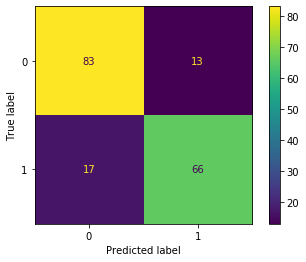

In [65]:
#Logistic Regression
lreg_f1score=round(lreg_f1score*100,2)
lreg_ascore=round(lreg_ascore*100,2)
print('lreg_f1score:',lreg_f1score,'\nlreg_ascore:',lreg_ascore)
plot_confusion_matrix(lreg,x_test,y_test)

In [66]:
#Importing ML algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [67]:
#KNN
knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 8}

In [68]:
knns,j=0,0
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    knn_f1score=round(f1_score(y_test,y_pred)*100,2)
    if knn_f1score>knns:
        knns=knn_f1score
        j=i
print('knn_f1score:',knns,'\nn_neighbors:',j)

knn_f1score: 81.29 
n_neighbors: 17


knn_f1score: 81.29 
knn_ascore: 83.8


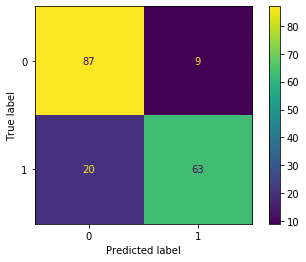

In [69]:
knn=KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
knn_f1score=round(f1_score(y_test,y_pred)*100,2)
knn_ascore=round(accuracy_score(y_test,y_pred)*100,2)
print('knn_f1score:',knn_f1score,'\nknn_ascore:',knn_ascore)
plot_confusion_matrix(knn,x_test,y_test)

In [70]:
#SVC
svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [71]:
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
svc_f1score,ker,C=0,0,0
for i in svc_parameters['kernel']:
    for j in svc_parameters['C']:
        svc=SVC(kernel=i,C=j)
        svc.fit(x_train,y_train)
        y_pred=svc.predict(x_test)
        f1score=round(f1_score(y_test,y_pred)*100,2)
        if f1score>svc_f1score:
            ker=i
            C=j
            svc_f1score=f1score
print('svc_f1score:',svc_f1score,'\nkernel:',ker,'\nC:',C)

svc_f1score: 82.28 
kernel: rbf 
C: 1


svc_f1score: 82.28 
svc_ascore: 84.36


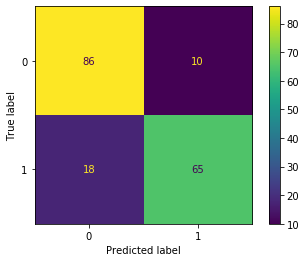

In [72]:
svc=SVC(kernel='rbf',C=1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
svc_f1score=round(f1_score(y_test,y_pred)*100,2)
svc_ascore=round(accuracy_score(y_test,y_pred)*100,2)
print('svc_f1score:',svc_f1score,'\nsvc_ascore:',svc_ascore)
plot_confusion_matrix(svc,x_test,y_test)

In [73]:
#Decision Tree Classifier
criterion = {'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier(random_state=42)
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'entropy'}

In [74]:
criterion = {'criterion':['entropy','gini']}
cri,dtc_f1score=0,0
for i in criterion['criterion']:
    dtc=DecisionTreeClassifier(criterion=i,random_state=42)
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    f1score=round(f1_score(y_test,y_pred)*100,2)
    if f1score>dtc_f1score:
        cri=i
        dtc_f1score=f1score
print('dtc_f1score:',dtc_f1score,'\ncriterion:',cri)

dtc_f1score: 78.48 
criterion: gini


dtc_f1score: 78.48 
dtc_ascore: 81.01


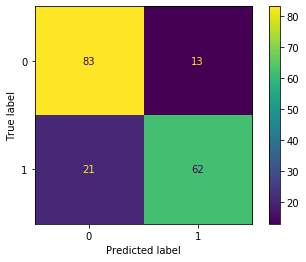

In [75]:
dtc=DecisionTreeClassifier(criterion='gini',random_state=42)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
dtc_f1score=round(f1_score(y_test,y_pred)*100,2)
dtc_ascore=round(accuracy_score(y_test,y_pred)*100,2)
print('dtc_f1score:',dtc_f1score,'\ndtc_ascore:',dtc_ascore)
plot_confusion_matrix(dtc,x_test,y_test)

gnb_f1score: 68.92 
gnb_ascore: 74.3


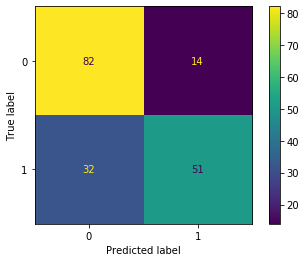

In [76]:
#GaussianNB > No Hyperparameter Tuning
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
gnb_f1score=round(f1_score(y_test,y_pred)*100,2)
gnb_ascore=round(accuracy_score(y_test,y_pred)*100,2)
print('gnb_f1score:',gnb_f1score,'\ngnb_ascore:',gnb_ascore)
plot_confusion_matrix(gnb,x_test,y_test)

In [77]:
#Random Forest Classifer
rf_ascore,k,m=0,0,0
for i in range(1,51):
    for j in range(50,151,50):
        rf=RandomForestClassifier(n_estimators=j,random_state=i)
        rf.fit(x_train,y_train)
        y_pred=rf.predict(x_test)
        ascore=round(accuracy_score(y_test,y_pred)*100,2)
        if ascore>rf_ascore:
            rf_ascore=ascore        
            k=j
            m=i
print("n_estimator:",j,' random_state',i,' rf_ascore',ascore)

n_estimator: 150  random_state 50  rf_ascore 83.8


Best Accuracy Score of 85.47 for Random Forest Classifer is at n_estimator: 100 and random_state 43

rf_f1score: 83.75 
rf_ascore: 85.47


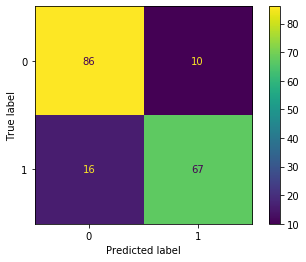

In [78]:
rf=RandomForestClassifier(n_estimators=100,random_state=43)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
rf_f1score=round(f1_score(y_test,y_pred)*100,2)
rf_ascore=round(accuracy_score(y_test,y_pred)*100,2)
print('rf_f1score:',rf_f1score,'\nrf_ascore:',rf_ascore)
plot_confusion_matrix(rf,x_test,y_test)

In [79]:
#Comparing all models
final=pd.DataFrame({'Model Name':['Logistic Regression','K Neighbors Classifier','Support Vector Classifier','Decision Tree Classifier','Gaussian NB','Random Forest Classifier'],
                   'Accuracy Score':[lreg_ascore,knn_ascore,svc_ascore,dtc_ascore,gnb_ascore,rf_ascore],
                   'F1 Score':[lreg_f1score,knn_f1score,svc_f1score,dtc_f1score,gnb_f1score,rf_f1score]})
final_df=final.sort_values(by='Accuracy Score',ascending=False)
final_df.head(6)

,Model Name,Accuracy Score,F1 Score
5,Random Forest Classifier,85.47,83.75
2,Support Vector Classifier,84.36,82.28
0,Logistic Regression,83.80,81.99
1,K Neighbors Classifier,83.80,81.29
3,Decision Tree Classifier,81.01,78.48
4,Gaussian NB,74.30,68.92


In [80]:
#Understanding important features using Random Forest (.feature_importances_)
pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(rf.feature_importances_,3)}).sort_values('Importance',ascending=False)

,Feature,Importance
8,Sex_Type,0.230
3,Fare,0.206
5,Age,0.174
0,Pclass,0.075
9,Cabin_Type,0.069
6,Age_Group,0.056
7,Fare_Group,0.055
4,Family,0.050
10,Port,0.032
1,SibSp,0.031


In [81]:
#Dropping ParCh as it has very less importance
x_train_new=x_train.drop('Parch',axis=1)
x_test_new=x_test.drop('Parch',axis=1)

rf_new_f1score: 80.77 
rf_new_ascore: 83.24


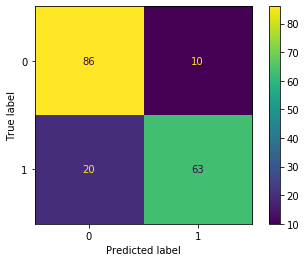

In [82]:
#Retraining the dataset after dropping ParCh
rf_new=RandomForestClassifier(n_estimators=100,random_state=43)
rf_new.fit(x_train_new,y_train)
y_pred=rf_new.predict(x_test_new)
rf_new_f1score=round(f1_score(y_test,y_pred)*100,2)
rf_new_ascore=round(accuracy_score(y_test,y_pred)*100,2)
print('rf_new_f1score:',rf_new_f1score,'\nrf_new_ascore:',rf_new_ascore)
plot_confusion_matrix(rf_new,x_test_new,y_test)

In [83]:
from sklearn.model_selection import cross_val_score

In [84]:
#Cross Validation with CV=10
models=[lreg,knn,svc,dtc,gnb,rf]
model_name=['Logistic Regression','K Neighbors Classifier','Support Vector Classifier','Decision Tree Classifier','Gaussian NB','Random Forest Classifier']
Mean,Std=[],[]
for i in models:
    val_score=cross_val_score(i,x_train,y_train,cv=10,scoring='accuracy')
    Mean.append(round(val_score.mean()*100,2))
    Std.append(round(val_score.std()*100,2))
pd.DataFrame({'Model Name':model_name,'Mean':Mean,'Std':Std}).sort_values(by='Mean',ascending=False)

,Model Name,Mean,Std
2,Support Vector Classifier,81.87,3.78
5,Random Forest Classifier,80.48,3.75
1,K Neighbors Classifier,80.19,3.71
0,Logistic Regression,78.64,4.44
3,Decision Tree Classifier,77.39,2.85
4,Gaussian NB,76.12,3.17


In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
#Create AdaBoost Classifier object
ada=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ada.fit(x_train,y_train)
y_pred=ada.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.5363128491620112
[[96  0]
 [83  0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        96
           1       0.00      0.00      0.00        83

    accuracy                           0.54       179
   macro avg       0.27      0.50      0.35       179
weighted avg       0.29      0.54      0.37       179



In [87]:
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [88]:
#save the model to pickle file
joblib.dump(SVC(kernel='rbf',C=1),'SVC_Titanic_Dataset.pkl')

['SVC_Titanic_Dataset.pkl']